#### This is another sales analysis worksheet that I got from one of my favourite data science youtubers Keith Galli. I encourage anyone to check out his youtube channel.

### Data import and  preprocessing 

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [131]:
files = [file for file in os.listdir("/Users/isaacbyron/Desktop/sales_data/SalesAnalysis/Sales_Data")]

In [132]:
print(files)

['Sales_December_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_August_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_September_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv']


In [133]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/Users/isaacbyron/Desktop/sales_data/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [152]:
df = all_months_data.copy()
len(df)

186850

In [153]:
df.info()
# we can see that all the columns are object dtype which we are going to have to change

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [154]:
df.isnull().sum()
df.isnull().sum() / len(df) * 100

# we are probably going have to deal with the null values

Order ID           0.292
Product            0.292
Quantity Ordered   0.292
Price Each         0.292
Order Date         0.292
Purchase Address   0.292
dtype: float64

### What is the best month for sales?

In [155]:
# deleting null values

null_df = df[df.isna().any(axis=1)]
null_df
# we can see that we have a lot of columns where the whole row is null values. We can just delete these

df = df.dropna(how='all') # drops rows where entire row is nan values
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [156]:
# we have the column 'order date' but it is dtype oject but we can convert it to datetime
df['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  186305 non-null  object        
 3   Price Each        186305 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [158]:
# we want the best month for sales, so using datetime we can easily extract the month of each sale

df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.000
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.000
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.000
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.000


In [159]:
# whenever I try to convert the Quantity Ordered Column we keep running into an error
# There must be some sort of nan value or something that is throwing it off so lets take a look to see
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [160]:
df[df['Quantity Ordered'] == 'Quantity Ordered']

# as we can see there is a bunch of arbritary rows that have the column name as the input
# these need to all be deleted

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
705,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
1101,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
2875,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
3708,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
...,...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
10784,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
10813,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan
11047,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,nan


In [161]:
# lets delete all those columns
df.drop(df.loc[df['Quantity Ordered']== 'Quantity Ordered'].index, inplace=True)

df[df['Quantity Ordered'] == 'Quantity Ordered']
# perfect looks like it worked

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [162]:
# now lets try to convert quantity ordered to int again.


df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

In [163]:
# now we have to convert dtype of price so we can multiply them together

df['Price Each'] = df['Price Each'].astype('float')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
 6   Month             182735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 11.2+ MB


In [165]:
df['Sales'] = df["Quantity Ordered"] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.000,1700.000
1,295666,LG Washing Machine,1,600.000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.000,600.000
2,295667,USB-C Charging Cable,1,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.000,11.950
3,295668,27in FHD Monitor,1,149.990,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.000,149.990
4,295669,USB-C Charging Cable,1,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.000,11.950


In [166]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

month_sales = df.groupby('Month').sum().sort_values('Sales', ascending = False)
month_sales = month_sales.reset_index()
month_sales

# we can see that sales were the highest in decemeber which makes sense with christmas

,Month,Quantity Ordered,Price Each,Sales
0,12.000,27764,4533151.680,4557905.420
1,10.000,22356,3658884.860,3679254.160
2,4.000,20226,3313522.350,3336376.420
3,11.000,19479,3130968.770,3149785.090
4,5.000,18344,3084756.090,3101881.040
5,3.000,16697,2740393.120,2755969.400
6,7.000,15781,2572764.750,2587444.910
7,6.000,14964,2508863.490,2524464.990
8,8.000,13185,2178183.810,2191698.310
9,2.000,13162,2145208.870,2158127.480


<AxesSubplot:xlabel='Month', ylabel='Sales'>

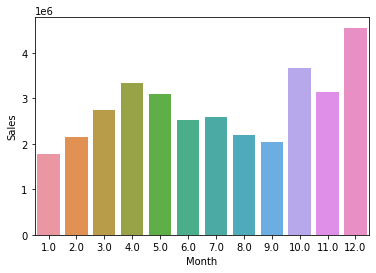

In [167]:
sns.barplot(data=month_sales, x='Month', y='Sales')

#### What city had the highest numbe of sales?

In [168]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.000,1700.000
1,295666,LG Washing Machine,1,600.000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.000,600.000
2,295667,USB-C Charging Cable,1,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.000,11.950
3,295668,27in FHD Monitor,1,149.990,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.000,149.990
4,295669,USB-C Charging Cable,1,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.000,11.950


In [194]:
# so if we look at the purchase address columns we can see the city where the item was pruchased
# we are going to want to exract the city and state name from that column


df["City"] = df["Purchase Address"].apply(lambda x: x.split(", ")[1])
df['State'] = df['Purchase Address'].apply(lambda x: x.split(", ")[2])
df['State'] = df['State'].apply(lambda x: x.split(" ")[0])
df['City'] = df[["City" , 'State']].apply(lambda x:", ".join(x), axis = 1)

In [195]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.000,1700.000,"New York City, NY",NY
1,295666,LG Washing Machine,1,600.000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.000,600.000,"New York City, NY",NY
2,295667,USB-C Charging Cable,1,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.000,11.950,"New York City, NY",NY
3,295668,27in FHD Monitor,1,149.990,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.000,149.990,"San Francisco, CA",CA
4,295669,USB-C Charging Cable,1,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.000,11.950,"Atlanta, GA",GA


In [205]:
city_sales = df.groupby('City').sum()['Sales']
city_sales = city_sales.reset_index()
city_sales

,City,Sales
0,"Atlanta, GA",2741642.050
1,"Austin, TX",1786745.520
2,"Boston, MA",3604080.860
3,"Dallas, TX",2717793.720
4,"Los Angeles, CA",5354039.930
5,"New York City, NY",4581658.910
6,"Portland, ME",444110.530
7,"Portland, OR",1832538.710
8,"San Francisco, CA",8124120.940
9,"Seattle, WA",2693048.600


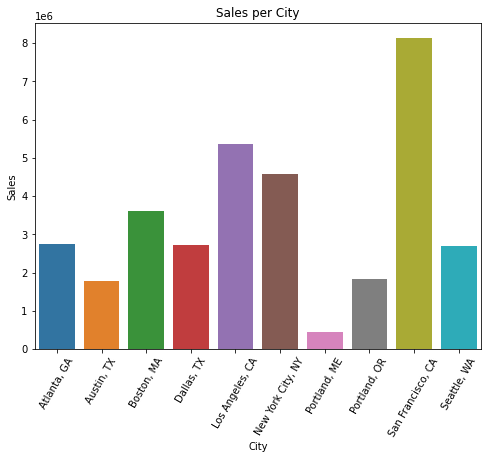

In [206]:
f, ax = plt.subplots(figsize = (8,6))

sns.barplot(data=city_sales, x='City', y='Sales')
plt.xticks(rotation = '60')
plt.title('Sales per City')
plt.show()

### What hour of  the day had the highest number sales

#### This is an in an interesting question because if we were looking to advertise our products this would allow us to know when the best time of the day is to advertise

In [208]:
df['Hour'] = df["Order Date"].dt.hour

In [209]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,295665,Macbook Pro Laptop,1,1700.000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.000,1700.000,"New York City, NY",NY,0
1,295666,LG Washing Machine,1,600.000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.000,600.000,"New York City, NY",NY,7
2,295667,USB-C Charging Cable,1,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.000,11.950,"New York City, NY",NY,18
3,295668,27in FHD Monitor,1,149.990,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.000,149.990,"San Francisco, CA",CA,15
4,295669,USB-C Charging Cable,1,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.000,11.950,"Atlanta, GA",GA,12


In [213]:
hour_count = df.groupby('Hour').count()
hour_count = hour_count.reset_index()
hour_count

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,0,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
1,1,2313,2313,2313,2313,2313,2313,2313,2313,2313,2313
2,2,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
3,3,816,816,816,816,816,816,816,816,816,816
4,4,843,843,843,843,843,843,843,843,843,843
5,5,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
6,6,2445,2445,2445,2445,2445,2445,2445,2445,2445,2445
7,7,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
8,8,6184,6184,6184,6184,6184,6184,6184,6184,6184,6184
9,9,8583,8583,8583,8583,8583,8583,8583,8583,8583,8583


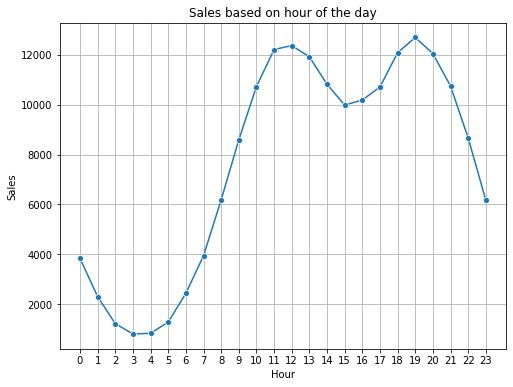

In [220]:
f, ax = plt.subplots(figsize = (8,6))
hours = [hour for hour, df in df.groupby('Hour')]


sns.lineplot(data=hour_count, x='Hour', y="Sales", marker = 'o')
plt.grid()
plt.title('Sales based on hour of the day')
plt.xticks(hours)
plt.show()

In [221]:
# We can see that around noon and 7pm has the highest number of sales